## Final Project Submission

Please fill out:
* Student name: Hanan Mohamed Maalim
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Mark Tiba
* Blog post URL:


## Business plan

Summary
Overview: Brief introduction to the business plan, summarizing Microsoft's venture into the movie industry.
Mission Statement: Clearly define the studio's mission and vision in the entertainment sector.
Objectives: Outline the primary goals, including market presence, audience engagement, and creative innovation.
Key Success Factors: Highlight factors critical to achieving success, such as quality content, technology utilization, and audience connection.
Business Description
Company Background: Introduce Microsoft's existing ventures and how the movie studio aligns with the company's overall vision.
Studio Overview: Detail the studio's structure, location, facilities, and key personnel.
Legal Structure: Specify the legal entity structure, ownership details, and regulatory compliance.
Market Analysis
Industry Overview: Analyze the current state of the movie industry, including market size, trends, and growth potential.
Audience Segmentation: Identify target demographics and audience preferences based on market research and data analysis.
Competitive Landscape: Assess competitors, their strengths, weaknesses, and market positioning.






## Data understanding

Data understanding for Microsoft's movie studio involves comprehending various facets:

Market Insights
Movie Industry Trends: Understanding the current state of the film industry, including genres in demand, emerging trends, and audience preferences.
Competitive Analysis: Analyzing competitors' strategies, successful movie releases, audience reception, and market position
ing.
Audience Analysis
Demographics: Identifying target demographics, such as age groups, gender, geographic location, and cultural preferences.
Consumer Behavior: Understanding how audiences engage with movies, streaming platforms, and entertainment content.
Preferences and Expectations: Analyzing audience expectations regarding storytelling, visual effects, genres, and interactive experiences.
Content Unde
rstanding
Genre Analysis: Assessing the performance of different genres in terms of box office success, critical acclaim, and audience engagement.
Successful Movies: Studying successful movies' attributes, including narrative style, character development, visual effects, and audience reception.
Technology
 Integration
Tech Utilization: Exploring technological advancements used in filmmaking, animation, special effects, and immersive experiences.
Streaming Platforms: Understanding the impact of streaming services on content consumption and distribution
.
Data Sources
Internal Data: Leveraging Microsoft's existing consumer data, market insights, and technological capabilities.
Industry Reports: Analyzing reports, studies, and industry publications related to the movie industry and entertainment sector.
Surveys and Feedback: Collecting feedback from test screenings, focus groups, and audience surveys.

In [8]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline 
import seaborn as sns
import sqlite3
conn = sqlite3.connect('im.db')

In [9]:
# load tmbd_movies dataset
tmdb_movies = pd.read_csv('tmdb.movies.csv')

# Load bom_movie_gross dataset
bom_movie_gross = pd.read_csv('bom.movie_gross.csv')

# Load rt_movie_info dataset
rt_movie_info = pd.read_csv('rt.movie_info.tsv', sep='\t')

# Load movie_budgets dataset
movie_budgets = pd.read_csv('tn.movie_budgets.csv')

# load rt_reviews dataset
rt_reviews = pd.read_csv('rt.reviews.tsv', sep='\t', encoding= 'latin1') 

In [10]:
# displaying information about the dataset
movie_budgets.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [11]:
movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [12]:
# Checking for Duplicate values
duplicates = movie_budgets[movie_budgets.duplicated()]
len(duplicates)

0

The dataset above does not have any missing values and duplicates

In [13]:
#columns related to budget and gross are currently stored as objects instead of numeric types (integers or floats)
#convert these columns into the appropriate data types (float).
cols_to_clean = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in cols_to_clean:
    movie_budgets[col] = movie_budgets[col].replace('[\$,]', '', regex=True).astype(float)
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [14]:
# Check data types after cleaning
movie_budgets.dtypes

id                     int64
release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object

In [15]:
# Convert 'release_date' column to datetime format
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


## Performing exploratory data analysis on movie_budgets dataset

In [16]:
# Display descriptive statistics for budget and revenue columns
print(movie_budgets[['production_budget', 'domestic_gross', 'worldwide_gross']].describe())

       production_budget  domestic_gross  worldwide_gross
count       5.782000e+03    5.782000e+03     5.782000e+03
mean        3.158776e+07    4.187333e+07     9.148746e+07
std         4.181208e+07    6.824060e+07     1.747200e+08
min         1.100000e+03    0.000000e+00     0.000000e+00
25%         5.000000e+06    1.429534e+06     4.125415e+06
50%         1.700000e+07    1.722594e+07     2.798445e+07
75%         4.000000e+07    5.234866e+07     9.764584e+07
max         4.250000e+08    9.366622e+08     2.776345e+09


In [17]:
#determine which movie was watched the most
# Calculate total gross revenue by adding 'domestic_gross' and 'worldwide_gross'
movie_budgets['total_gross'] = movie_budgets['domestic_gross'] + movie_budgets['worldwide_gross']

# Find the movie with the highest total gross revenue
movie_with_highest_gross = movie_budgets.loc[movie_budgets['total_gross'].idxmax()]

print("Movie with the highest total gross revenue:")
print(movie_with_highest_gross[['movie', 'total_gross']])

Movie with the highest total gross revenue:
movie                Avatar
total_gross    3536852904.0
Name: 0, dtype: object


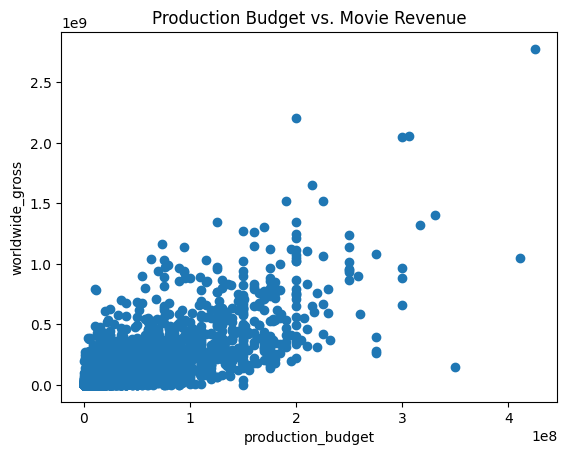

In [18]:
plt.scatter(movie_budgets['production_budget'], movie_budgets['worldwide_gross'])
plt.xlabel('production_budget')
plt.ylabel('worldwide_gross')
plt.title('Production Budget vs. Movie Revenue')
plt.savefig('budget_revenue.png')
plt.show()

In [19]:
# Display the first few rows of the tmdb_movies dataset to preview its contents
tmdb_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [20]:
# displaying information about the dataset
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [21]:
tmdb_movies.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [22]:
#checking for duplicates
duplicates = tmdb_movies[tmdb_movies.duplicated()]
len(duplicates)

0

tmdb_movies dataset has neither missing values nor duplicates

## Performing Exploratory Data Analysis on tmdb_movies dataset
## Based on distibution of movie ratings


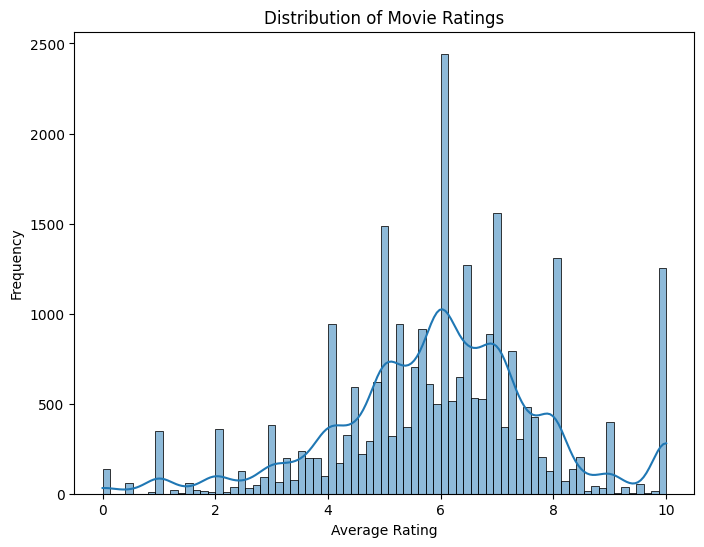

In [23]:
#movie rating analysis
# Plotting a histogram for movie ratings (vote_average)

plt.figure(figsize=(8, 6))
sns.histplot(tmdb_movies['vote_average'], kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()


From the histogram above,the most frequent average movie rating falls around 6.They were moderately appreciated.
some movies garnered the maximum rating of 10, showcasing their popularity or critical acclaim.
.


In [24]:
#displaying dataset for rotten tomatoes
rt_movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [25]:
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [26]:
rt_movie_info.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

There are several missing values for all the columns except id column.
To deal with the missing values,the dataset should be cleaned

In [27]:
rt_movie_info.dropna(subset=['synopsis','box_office','currency','runtime','director','writer','studio','theater_date','dvd_date','rating'], inplace=True)
rt_movie_info.head()


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,"20,518,224",127 minutes,Universal Pictures


The missing values for the rows were dropped.

In [28]:
#confirming that there are no missing values
rt_movie_info.isna().sum()

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
currency        0
box_office      0
runtime         0
studio          0
dtype: int64

Performing Exploratory Data Analysis based on;rating,genre distribution and directors

In [29]:
#analysing the data
#statistical information
rt_movie_info.describe()


,id
count,235.000000
mean,1010.217021
std,578.522979
min,3.000000
25%,488.500000
50%,1044.000000
75%,1526.000000
max,1985.000000


In [30]:
#occurence of each rating
rt_movie_info['rating'].value_counts()


rating
R        105
PG-13     77
PG        38
NR         9
G          5
NC17       1
Name: count, dtype: int64

In [31]:
#analysis using genre
#frequency of each unique value
rt_movie_info['genre'].value_counts()


genre
Drama                                                                        33
Comedy                                                                       32
Comedy|Drama                                                                 22
Drama|Mystery and Suspense                                                   11
Comedy|Drama|Romance                                                          9
                                                                             ..
Comedy|Mystery and Suspense                                                   1
Art House and International|Horror|Mystery and Suspense                       1
Art House and International|Comedy|Drama                                      1
Action and Adventure|Art House and International|Comedy|Cult Movies|Drama     1
Action and Adventure|Art House and International                              1
Name: count, Length: 76, dtype: int64

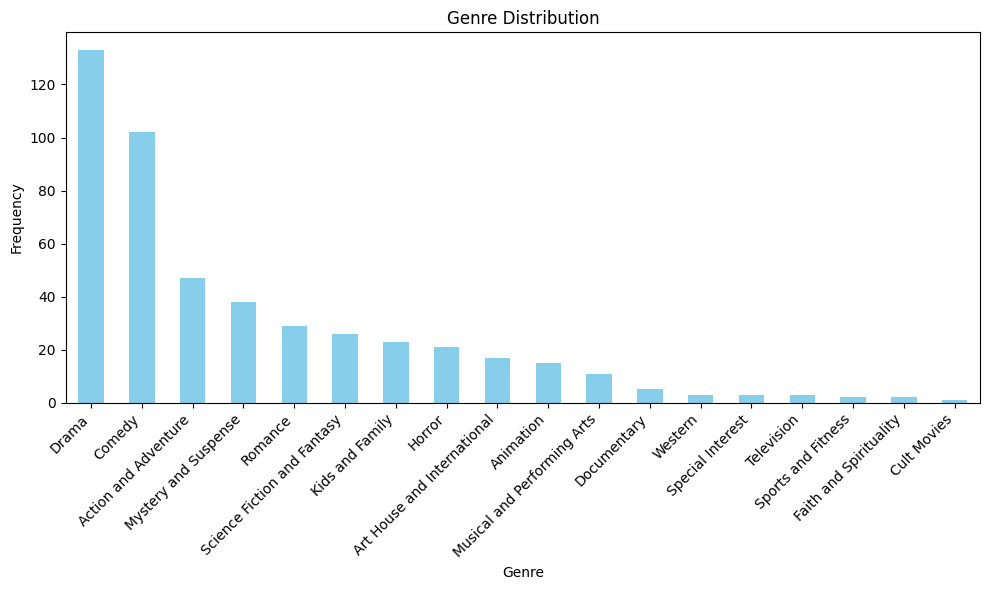

In [65]:

# Splitting combined genres and stacking them into separate rows
genres = rt_movie_info['genre'].str.split('|').apply(pd.Series).stack().reset_index(drop=True)

# Getting the value counts of each genre
genre_counts = genres.value_counts()

# Plotting the genre distribution
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()




In [33]:
#analysing using top 15 directors
top_directors = rt_movie_info['director'].value_counts().head(15)
top_directors

director
Clint Eastwood      3
Sam Mendes          2
Bryan Singer        2
Barry Levinson      2
Ang Lee             2
Seth MacFarlane     2
Gore Verbinski      2
Jay Roach           2
Kasi Lemmons        2
Brian Robbins       2
Thor Freudenthal    2
Yimou Zhang         2
Paul Feig           2
Bruce Beresford     2
David Fincher       2
Name: count, dtype: int64

Movies rated R had the most count(105)and NC had the least(1).Drama films had the most count(33) movies,Action and Adventure|Art House and International had the least count(1).The top 15 top direcors represents directors with multiple credits in dataset,Clint Eastwood having the most counts(3)

In [34]:
rt_reviews


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [35]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [36]:
rt_reviews.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

The dataset has rows that have missing values hence should be cleaned

## Data cleaning

In [37]:
#cleaning the dataset by dropping rows
rt_reviews.dropna(subset=['review','critic','publisher','rating'], inplace=True)
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"


The rows with missing values were dropped

In [38]:
#confirming all rows with missing values have been dropped
rt_reviews.isna().sum()

id            0
review        0
rating        0
fresh         0
critic        0
top_critic    0
publisher     0
date          0
dtype: int64

In [39]:
 #displaying dataset for Box Office Mojo
bom_movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [40]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [41]:
bom_movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [42]:
# Drop rows with missing values in the 'studio' and 'domestic_gross' column
bom_movie_gross.dropna(subset=['studio','domestic_gross'] , inplace=True)
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [43]:
# Convert 'foreign_gross' column to numeric type
bom_movie_gross['foreign_gross'] = bom_movie_gross['foreign_gross'].str.replace(',', '').astype(float)

# Replace missing values in 'foreign_gross' with its mean
mean_foreign_gross = bom_movie_gross['foreign_gross'].mean()
bom_movie_gross['foreign_gross'].fillna(mean_foreign_gross, inplace=True)
bom_movie_gross


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,6.520000e+08,2010
1,Alice in Wonderland (2010),BV,334200000.0,6.913000e+08,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,6.643000e+08,2010
3,Inception,WB,292600000.0,5.357000e+08,2010
4,Shrek Forever After,P/DW,238700000.0,5.139000e+08,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,7.579038e+07,2018
3383,Edward II (2018 re-release),FM,4800.0,7.579038e+07,2018
3384,El Pacto,Sony,2500.0,7.579038e+07,2018
3385,The Swan,Synergetic,2400.0,7.579038e+07,2018


Cleaning dataset by dropping rows that have missing values in the studio column and replacing the missing values with the mean of foreign gross column

In [44]:
#confirming that the data has been cleaned
bom_movie_gross.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

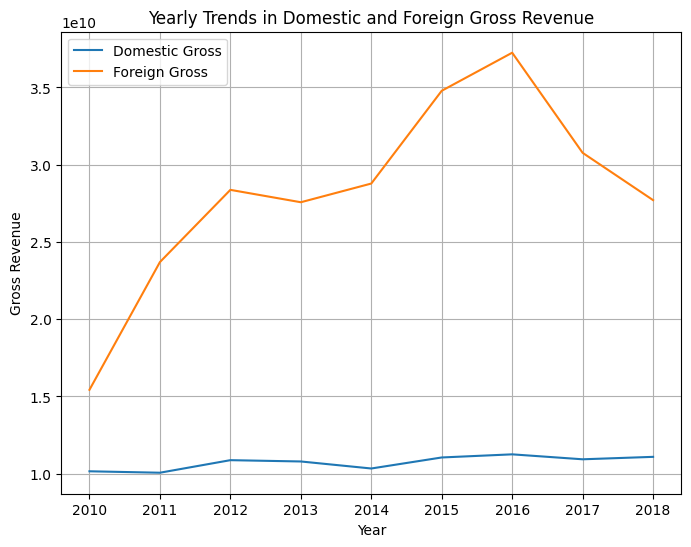

In [45]:
#performing EDA on Box Office Mojo dataset
# Group data by 'year' and calculate the sum of 'domestic_gross' and 'foreign_gross'
yearly_gross = bom_movie_gross.groupby('year')[['domestic_gross', 'foreign_gross']].sum()

# Plotting the trends for domestic and foreign gross over the years
plt.figure(figsize=(8, 6))

# Line plot for domestic gross
plt.plot(yearly_gross.index, yearly_gross['domestic_gross'], label='Domestic Gross')

# Line plot for foreign gross
plt.plot(yearly_gross.index, yearly_gross['foreign_gross'], label='Foreign Gross')

plt.title('Yearly Trends in Domestic and Foreign Gross Revenue')
plt.xlabel('Year')
plt.ylabel('Gross Revenue')
plt.legend()
plt.grid(True)
plt.show()

From the above line plot,The foreign gross is fluctuating, showing irregular peaks over different years.The domestic gross seems more stable or consistent over the years

In [46]:
# Group data by 'title' and calculate the sum of 'domestic_gross' and 'foreign_gross'
movie_gross = bom_movie_gross.groupby('title')[['domestic_gross', 'foreign_gross']].sum()

# Compare domestic and foreign gross earnings for each movie
movie_gross['total_gross'] = movie_gross['domestic_gross'] + movie_gross['foreign_gross']

# Sort by total gross in descending order
movie_gross_sorted = movie_gross.sort_values(by='total_gross', ascending=False)

# Display the comparison from highest to lowest total gross earnings
print(movie_gross_sorted.head(10))  # Displaying top 10 movies by gross earnings


                                             domestic_gross  foreign_gross  \
title                                                                        
Marvel's The Avengers                           623400000.0    895500000.0   
Avengers: Age of Ultron                         459000000.0    946400000.0   
Black Panther                                   700100000.0    646900000.0   
Harry Potter and the Deathly Hallows Part 2     381000000.0    960500000.0   
Star Wars: The Last Jedi                        620200000.0    712400000.0   
Jurassic World: Fallen Kingdom                  417700000.0    891800000.0   
Frozen                                          400700000.0    875700000.0   
Beauty and the Beast (2017)                     504000000.0    759500000.0   
Incredibles 2                                   608600000.0    634200000.0   
Iron Man 3                                      409000000.0    805800000.0   

                                              total_gross  
tit

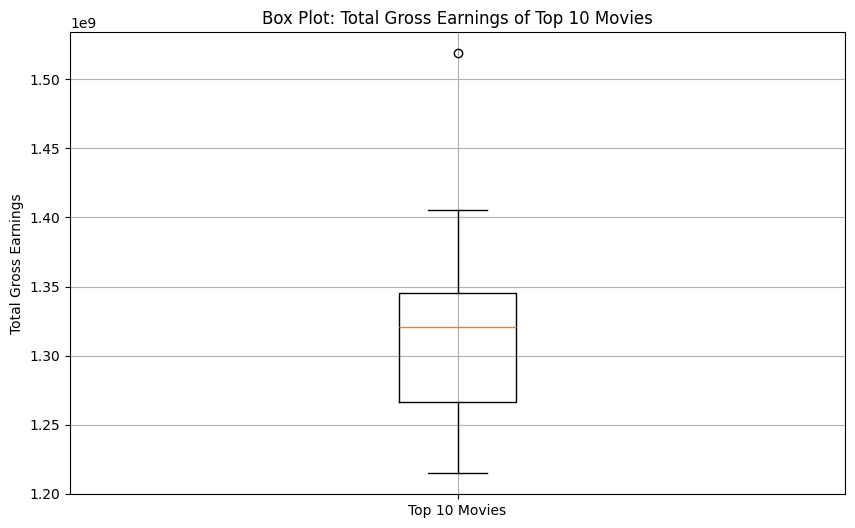

In [62]:
# Plotting a box plot to visualize the total gross earnings for the top 10 movies

plt.figure(figsize=(10, 6))
plt.boxplot(movie_gross_sorted['total_gross'].head(10))
plt.title('Box Plot: Total Gross Earnings of Top 10 Movies')
plt.ylabel('Total Gross Earnings')
plt.xticks([1], ['Top 10 Movies'])
plt.grid(True)
plt.show()

In [48]:
# Group data by 'studio' and calculate the sum of 'domestic_gross' and 'foreign_gross'
studio_gross = bom_movie_gross.groupby('studio')[['domestic_gross', 'foreign_gross']].sum()

# Compare domestic and foreign gross earnings for each studio
studio_gross['total_gross'] = studio_gross['domestic_gross'] + studio_gross['foreign_gross']

# Sort studios by total gross in descending order
studio_gross_sorted = studio_gross.sort_values(by='total_gross', ascending=False)

# Display the comparison from highest to lowest total gross earnings
print(studio_gross_sorted.head(10))  


         domestic_gross  foreign_gross   total_gross
studio                                              
BV         1.841903e+10   2.594544e+10  4.436446e+10
WB         1.216805e+10   1.942581e+10  3.159385e+10
Fox        1.094950e+10   2.020745e+10  3.115695e+10
Uni.       1.290239e+10   1.708214e+10  2.998454e+10
Sony       8.459683e+09   1.424840e+10  2.270808e+10
Par.       7.685871e+09   1.239392e+10  2.007979e+10
WB (NL)    3.995700e+09   6.414790e+09  1.041049e+10
LGF        4.118963e+09   5.612475e+09  9.731438e+09
IFC        1.126629e+08   7.826187e+09  7.938850e+09
Magn.      6.355970e+07   6.644150e+09  6.707710e+09


The output displays the top 10 movies and studios ranked by their total gross.Marvel the Avengers having the highest total gross and BV studio generating the most gross

In [49]:
#previewing dataset for imdb
data = pd.read_sql_query('SELECT name from sqlite_master where type= "table";', conn) 

data

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers
8,rt_movie_info
9,rt_reviews


In [50]:
#displaying the table movie_ratings
movie_ratings = pd.read_sql('''SELECT * FROM movie_ratings;''', conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [51]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [52]:
movie_ratings.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [53]:
# Merging The movie_ratings and movie_basics in the imdb dataset

query = """ 

SELECT * 
    FROM movie_basics
    JOIN movie_ratings
        USING (movie_id)

;
"""
merged_data = pd.read_sql(query, conn)
merged_data.head()



,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [54]:
merged_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [55]:
merged_data.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [56]:
merged_data.dropna(subset=['runtime_minutes', 'genres'], inplace=True)
merged_data.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


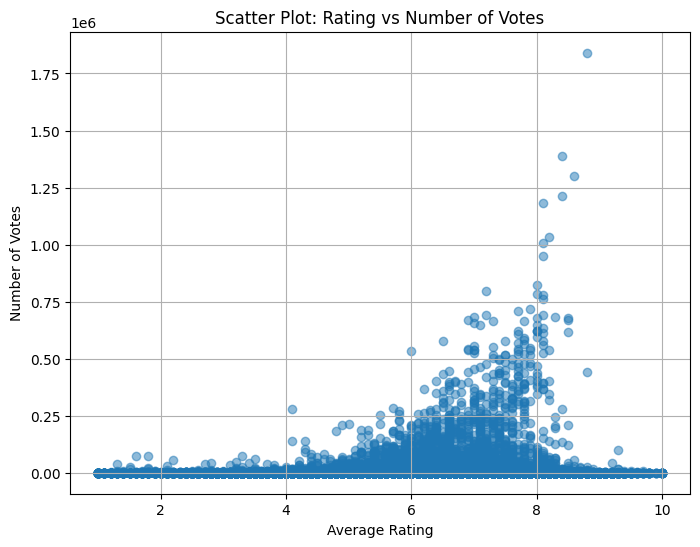

In [57]:
# Plotting a scatter plot between 'averageRating' and 'numVotes'
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['averagerating'], merged_data['numvotes'], alpha=0.5)
plt.title('Scatter Plot: Rating vs Number of Votes')
plt.xlabel('Average Rating')
plt.ylabel('Number of Votes')
plt.grid(True)
plt.show()

## Conclusion


The success of 'Marvel's The Avengers' and the dominance of BV Studio in total gross emphasize the prosperity of movies within established franchises, especially those crafting shared universes. This signifies the potential audience engagement across multiple films.

'Avatar' as the most viewed movie underscores the allure of immersive experiences. Emphasize visually striking movies with captivating storytelling to transport audiences into unique and engaging worlds.

While the superhero genre's immense success is evident, exploring diverse genres while maintaining high-quality storytelling can also resonate strongly with audiences. Embrace creativity across various genres for potential unexpected succees."

## Recommendations

Establish a Connected Universe: Consider creating a series of movies that interconnect or are part of a shared universe. This approach can build anticipation, drive fan engagement, and create long-term box office success.

Invest in Visual Spectacle: Emphasize high-quality visual effects and immersive storytelling to create unique and captivating movie experiences. Audiences are drawn to films that provide an escape and a visually stunning world.

Strategic Partnerships: Collaborate with established studios or filmmakers to leverage their expertise and gain insights into successful movie production. Strategic partnerships can help in navigating the complexities of the movie industry.

Explore Diverse Storytelling: While considering franchises, also explore diverse genres and storytelling techniques to cater to different audience preferences and potentially discover new box office hits.

By incorporating these insights and recommendations, Microsoft's new movie studio can aim to create compelling, visually stunning films that resonate with audiences, potentially leading to success at the box office.